# Fit Using Inequality Constraint

This example shows how to use `lmfit_global.py` with inequality constraints by making use of `lmfit Parameter`(s) `expr`. 

This example is similar to `example_fit_with_inequality.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../lmfit_global')
    from lmfit_global import LmfitGlobal
    
import matplotlib.pyplot as plt

create raw data...

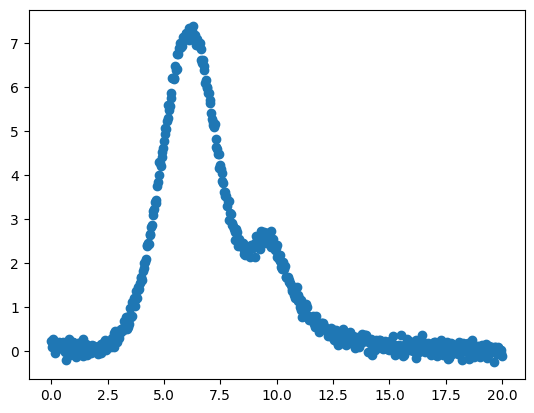

In [2]:
import os
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))



def lorentzian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Lorentzian function.

    lorentzian(x, amplitude, center, sigma) =
        (amplitude/(1 + ((1.0*x-center)/sigma)**2)) / (pi*sigma)

    """
    return ((amplitude/(1 + ((1.0*x-center)/max(tiny, sigma))**2))
            / max(tiny, (np.pi*sigma)))


np.random.seed(0)
x = np.linspace(0, 20.0, 601)

data = (
    gaussian(x, 21, 6.1, 1.2) + lorentzian(x, 10, 9.6, 1.3) +
    np.random.normal(scale=0.1, size=x.size)
        )

xy_dat = np.column_stack([x, data])

plt.plot(x, data, 'o')

built `data` and `function` **`item`** `dict` for `LmfitGlobal` ...

In [3]:
# data dict
data_dict = {
    'xy': xy_dat,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }


func_lst = [
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':20.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':5, },
            'sigma': {'value':1, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': lorentzian,
        'init_params' : {
            'amplitude': {'value':8.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':8, },
            'sigma': {'value':1, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': ['+'],
}


# """
# # --- The `theory_connectors` (list of str): 
#     A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
#     the theory functions listed in 'theory'. Each operator connects one function to the next 
#     in left-to-right order. 
    
#     For example: 
#     - ['+', '+'] means: theory[0] + theory[1] + theory[2].

#     - ['+', '*'] means: theory[0] + theory[1] * theory[2].

#     The number of connectors must be exactly one less than the number of theory functions.
#     The ONLY (so-far) supported operators are: '+', '-', '*', '/'.
# """


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. thoery (see above)
}

call `LmfitGlobal` ...

In [4]:
LFG = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: ############################################################################
INFO: # y(x;) = gaussian(x, amplitude, center, sigma) + lorentzian(x, amplitude, #
INFO: # center, sigma)                                                           #
INFO: ############################################################################


Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
c0_amplitude_0        20     -inf      inf     None     True     None     None
c0_center_0            5     -inf      inf     None     True     None     None
c0_sigma_0             1     -inf      inf     None     True     None     None
c1_amplitude_0         8     -inf      inf     None     True     None     None
c1_center_0            8     -inf      inf     None     True     None     None
c1_sigma_0             1     -inf      inf     None     True     None     None


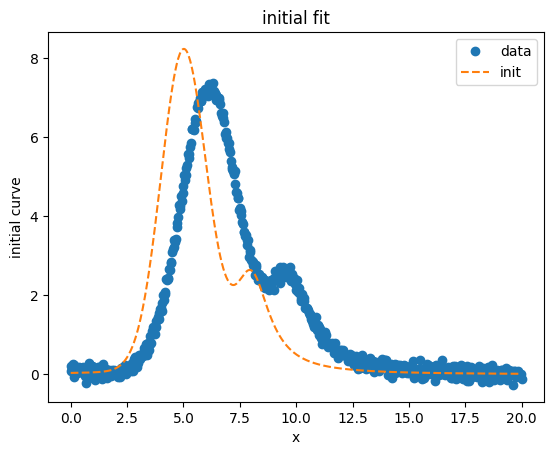

In [5]:
LFG.initial_params.pretty_print()  # pretty print initial parameters

axes0 = LFG.plot_init()  # plot init parameters

In [6]:
LFG.fit(verbose=True)  # verbose, if True will show fit parameters

INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: c0_amplitude_0     21.18     -inf      inf  0.07534     True     None     None
INFO: c0_center_0        6.102     -inf      inf 0.003762     True     None     None
INFO: c0_sigma_0          1.21     -inf      inf 0.004152     True     None     None
INFO: c1_amplitude_0      9.64     -inf      inf   0.1127     True     None     None
INFO: c1_center_0        9.616     -inf      inf  0.01249     True     None     None
INFO: c1_sigma_0         1.245     -inf      inf  0.01754     True     None     None
INFO: Coefficient of determination: R² = 0.99772960 (uniform average)...
INFO: Coefficient of determination: R² = 0.99772960 (variance-weighted)...


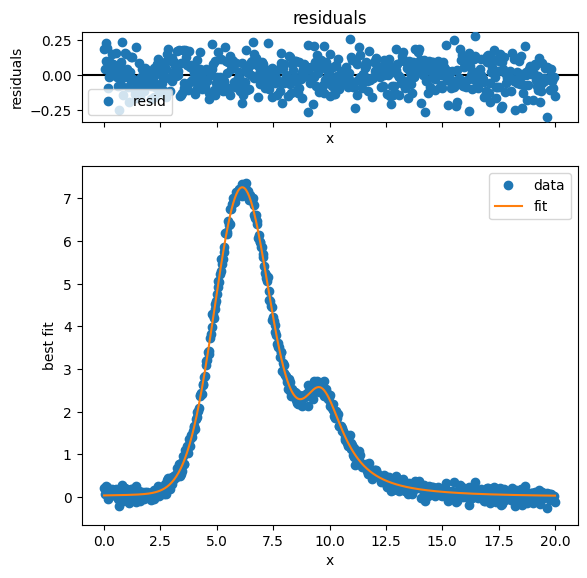

In [7]:
axes1 = LFG.plot(show_init=False)   # plot fit data & residuals and show initial plot (if True)

In [8]:
LFG.report()

[[Model]]
    (Model(gaussian, prefix='c0_') + Model(lorentzian, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 601
    # variables        = 6
    chi-square         = 5.95307350
    reduced chi-square = 0.01000517
    Akaike info crit   = -2761.42706
    Bayesian info crit = -2735.03549
    R-squared          = 0.99772960
[[Variables]]
    c0_amplitude_0:  21.1752976 +/- 0.07534174 (0.36%) (init = 20)
    c0_center_0:     6.10195712 +/- 0.00376180 (0.06%) (init = 5)
    c0_sigma_0:      1.20982321 +/- 0.00415189 (0.34%) (init = 1)
    c1_amplitude_0:  9.63958198 +/- 0.11269852 (1.17%) (init = 8)
    c1_center_0:     9.61639910 +/- 0.01249022 (0.13%) (init = 8)
    c1_sigma_0:      1.24499366 +/- 0.01753847 (1.41%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1_amplitude_0, c1_sigma_0)     = +0.8397
    C(c0_amplitude_0, c0_sigma_0)     = +0.7842
    C(c0_amplitude_0, c1_amplitude_0) = 

Create the fitting parameters and set an inequality constraint for `c1_center_0`.

First, we add a new fitting parameter peak_split called `alpha`, which can take values between 0 and 5. 

Afterwards, we constrain the value for `c1_center_0` using the expression to be `alpha + c0_center_0`:

we use `LmfitGlobal.set_global_expr(*parlist, expr=None)`

NOTE: `alpha` was created with out `_0` at the end ie. `alpha_0` to ensure its not data dependent parameters

In [9]:
# --- add alpha ----
# since alpha was not defined in the func_lst functions above
# we can add it using .update_params(); like
value  = 2.5
alpha = ('alpha', value, True, 0, 5, None, None)
LFG.update_params(alpha)


# --- set "inequality" contrain below
LFG.set_global_expr('c1_center_0', expr='alpha + c0_center_0')
LFG.set_global_expr('c1_sigma_0', expr='c0_sigma_0')


LFG.initial_params.pretty_print()  # pretty print initial parameters

INFO: Set expr for "c1_center_0" → alpha + c0_center_0 (vary=False)
INFO: Set expr for "c1_sigma_0" → c0_sigma_0 (vary=False)


Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha                2.5        0        5     None     True     None     None
c0_amplitude_0        20     -inf      inf     None     True     None     None
c0_center_0            5     -inf      inf     None     True     None     None
c0_sigma_0             1     -inf      inf     None     True     None     None
c1_amplitude_0         8     -inf      inf     None     True     None     None
c1_center_0          7.5     -inf      inf     None    False alpha + c0_center_0     None
c1_sigma_0             1     -inf      inf     None    False c0_sigma_0     None


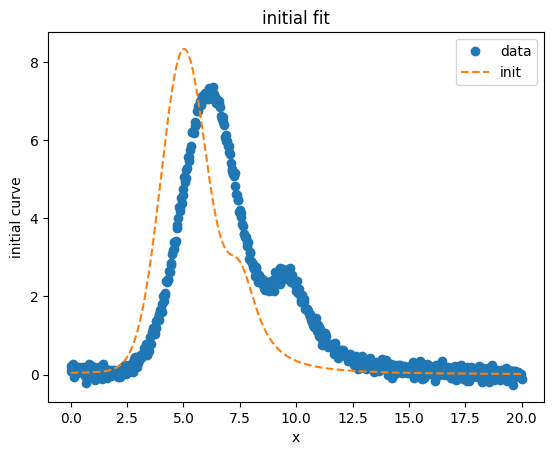

In [10]:
axes0 = LFG.plot_init()  # plot init parameters

fit  again...

In [11]:
LFG.fit(verbose=True, iter_cb=per_iteration)  # verbose, if True will show fit parameters

NameError: name 'per_iteration' is not defined

In [ ]:
axes1 = LFG.plot(show_init=False)   # plot fit data & residuals and show initial plot (if True)

In [ ]:
LFG.report()

In [ ]:
# --- fit data
yfit = LFG.eval()                     # evaluate with x raw data define above
xfit = np.linspace(0, 25, num=6000)   # if more dense data is needed
yfit = LFG.eval(x=xfit)               # dense 

# --- components
# use .eval_components() or .eval_components_per_dataset()
comps = LFG.eval_components()         # evaluate with x raw data define above
comps = LFG.eval_components(x=xfit)   # dense 
# evaluate fit per datasets
# since we are dealing with single dataset
# we expect dict['0'], for n datasets dict['0', '1', '2', ...'n-1']
print('dataset label = ', list(comps.keys()))
# since we are dealin with three components,
# each dataset will have dictionary of 3 component label 'c0', 'c1',
print('component label of dataset "0" = ', list(comps['0'].keys()))
# print('component label of dataset "1" = ', list(comps['1'].keys()))
# where 'c0', and 'c1' are exponential, gaussian 1 and gaussian 2 componets
# i.e. in order of how they are define in `func_lst` above

# --- Also, we can extract initial and best fit as ---
init_fit = LFG.init_fit   # default with x raw data
best_fit = LFG.best_fit   # default with x raw data
# -- or 
init_fit = LFG.eval(params=LFG.initial_params, x=xfit)  # using dense x-array
best_fit = LFG.eval(x=xfit)  # using dense x-array


# --- plot as you desired favorite 

In [ ]:
# --- create subplots panel ----
fontsize=18
fig = plt.figure(
    figsize=(12, 6),
    layout='tight' # 'constrained', 'compressed', 'tight', 'none', `.LayoutEngine`, None; default: None
)
axes = fig.subplots(
    nrows=1,
    ncols=2,
    sharex=False,
    sharey=True,
)
for ax in axes.ravel():
    # Major ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='in',
        length=8,       # major tick length
        width=1.2,      # major tick width
        labelsize=fontsize+0,
        labelcolor='k'
    )

    # Minor ticks
    ax.tick_params(
        axis='both',
        which='minor',
        direction='in',
        length=4,       # minor tick length
        width=1.0       # minor tick width
    )
    ax.tick_params(
        axis='both', which='both',
        top=True, bottom=True, 
        left=True, right=True
        )
    for spine in ax.spines.values():
        spine.set_linewidth(2)   # choose thickness you want

    ax.set_xscale('linear')    
    ax.set_xlim([-1, 25])
    ax.set_xlabel('x', fontsize=fontsize)

    ax.minorticks_on()
ylabel=r'y'
axes[0].set_ylabel(ylabel, fontsize=fontsize)

axes[0].plot(x, data, 'ko', label='Data', zorder=1)   # raw data
axes[1].plot(x, data, 'ko', label='Data', zorder=1)   # raw data


axes[0].plot(xfit, init_fit, 'k--', label='initial fit', zorder=2)
axes[0].plot(xfit, best_fit, 'r-',  lw=2, label='best fit', zorder=2)


axes[1].plot(xfit, yfit, 'r-', lw=2, label='fit', zorder=2)
axes[1].plot(xfit, comps['0']['c0'], '--', label='gaussian component', zorder=3)
axes[1].plot(xfit, comps['0']['c1'], '--', label='lorentzian component', zorder=4)

prop={'size': fontsize-2, 'weight':'normal'}
for ax in axes.ravel():
    ax.legend(frameon=True, prop=prop)